 <p style="text-align: center;"> Bank Marketing Campaign Predictive Modeling </p>

###### About the dataset - Find the best strategy to improve the next marketing campaign
<br>Link: https://www.kaggle.com/janiobachmann/bank-marketing-dataset

## Data Description

1 - Age
<br>2 - Job: Type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
<br>3 - Marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<br>4 - Education: (categorical: primary, secondary, tertiary and unknown)
<br>5 - Default: has credit in default? (categorical: 'no','yes','unknown')
<br>6 - Housing: has housing loan? (categorical: 'no','yes','unknown')
<br>7 - Loan: has personal loan? (categorical: 'no','yes','unknown')
<br>8 - Balance: Balance of the individual
<br>9 - contact: contact communication type (categorical: 'cellular','telephone')
<br>10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>11 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
<br>12 - duration: last contact duration, in seconds (numeric)
<br>13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>15 - previous: number of contacts performed before this campaign and for this client (numeric)
<br>16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Initialization

### Imports

In [1]:
#!pip install janitor

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import (
    enable_iterative_imputer, 
)
from sklearn import impute
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn import metrics

### Read dataset

In [2]:
#Read dataset
raw_dataset = pd.read_csv(r"C:\Users\Ramy\Desktop\Entreprise_Final_Project/bank.csv")
data=raw_dataset

In [3]:
raw_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Exploratory Data Analysis

### Check datatypes

In [4]:
raw_dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

### Count of columns with specific datatype

Text(0, 0.5, 'Data type')

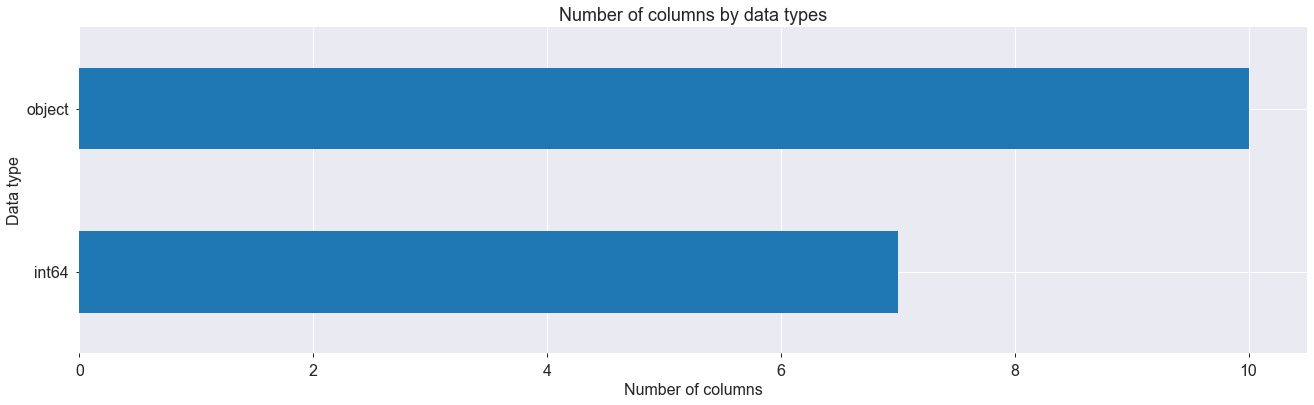

In [5]:
raw_dataset.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(22, 6),
                                            fontsize=16)

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

### Summary statistics

In [6]:
raw_dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Count the number of categories for each object data

In [7]:
raw_dataset.select_dtypes('object').apply(pd.Series.nunique, axis=0)

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
deposit       2
dtype: int64

### Pandas profiling

In [8]:
raw_dataset.profile_report(style={'full_width':True})

# To retrieve the list of variables which are rejected due to high correlation
profile = raw_dataset.profile_report()
rejected_variables = profile.get_rejected_variables(threshold=0.9)

# To generate a HTML report
profile = raw_dataset.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

### Notes from pandas profiling report

Missing values: <br>
1. 11k rows <br>
2. There are no missing values<br>
3. There are no duplicate rows <br>
4. Some outliers in the field 'balance' <br>
5. Just one percent of the rows had a default

### Check the distribution of default, deposit, loan and poutcome

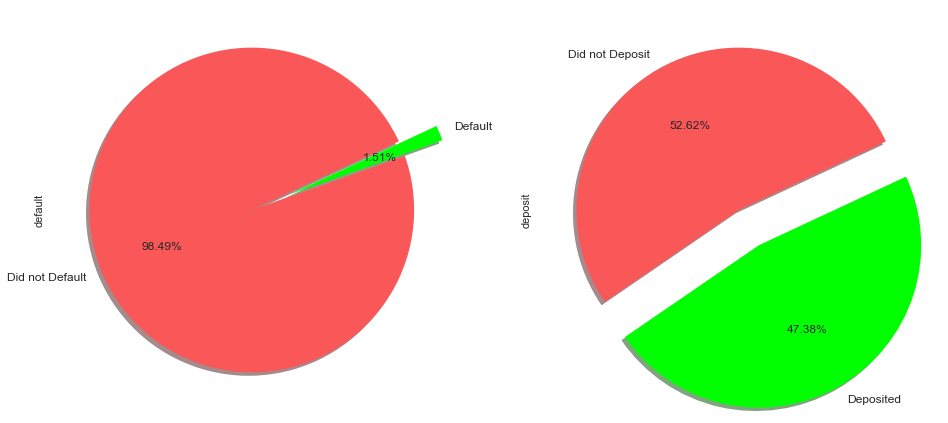

In [9]:
f, ax = plt.subplots(1,2, figsize=(16,8))

labels ="Did not Default", "Default"
colors = ["#FA5858", "#00ff00"]

raw_dataset["default"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


labels ="Did not Deposit", "Deposited"
colors = ["#FA5858", "#00ff00"]

raw_dataset["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[1], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

plt.show()

<div class="alert alert-block alert-danger">
<b>Imbalance alert</b> Just 1.5% of the data points defaulted
</div>

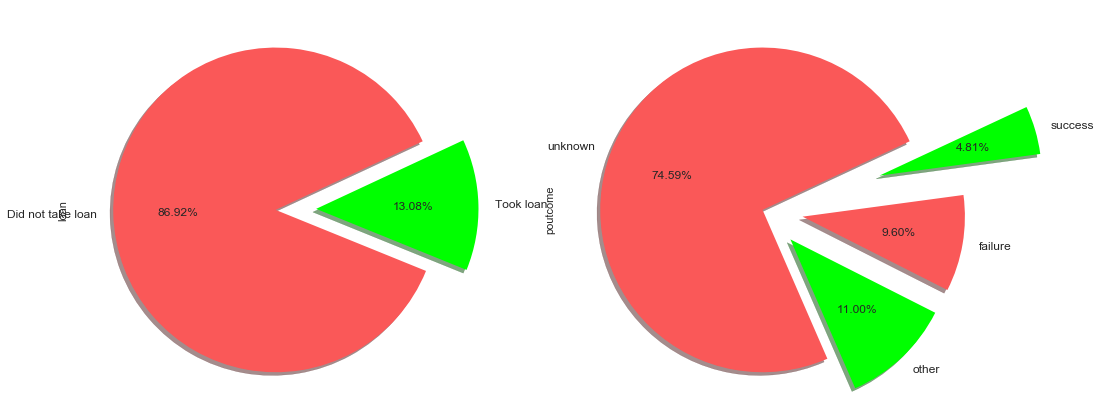

In [10]:
f, ax = plt.subplots(1,2, figsize=(16,8))

labels ="Did not take loan", "Took loan"
colors = ["#FA5858", "#00ff00"]

raw_dataset["loan"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%',  ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

labels = 'unknown', 'other', 'failure', 'success'
colors = ["#FA5858", "#00ff00"]

raw_dataset["poutcome"].value_counts().plot.pie(explode=[0,0.25, 0.25,0.75], autopct='%1.2f%%',  ax=ax[1], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

plt.show()

<div class="alert alert-block alert-danger">
<b>Imbalance alert</b> Just 13% of the data points took loans
</div>

### Check distribution of deposit across jobs

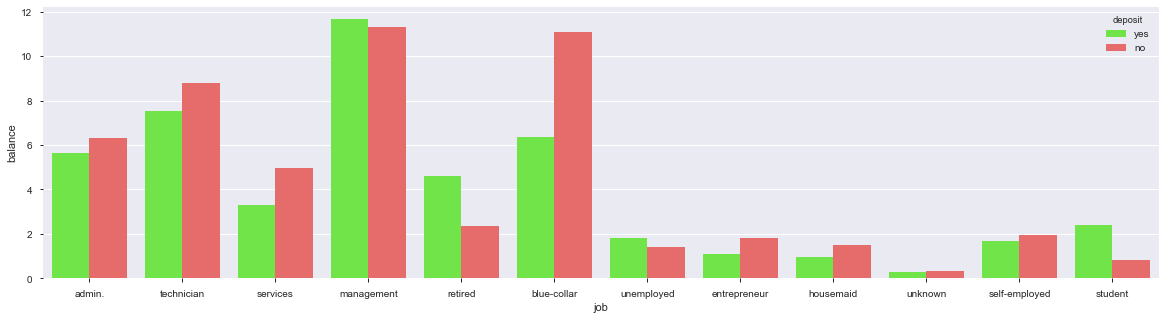

In [11]:
df= raw_dataset
plt.figure(figsize=(20,5))

ax[0].set_ylabel('% of Deposits', fontsize=14)

palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="job", y="balance", hue="deposit", data=raw_dataset, palette=palette, estimator=lambda x: len(x) / len(raw_dataset) * 100)
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")

plt.show()

### Account balance and deposit

For better visualization, we will chop off all data points having balance above 75 percentile - Just for the below chart

Text(0, 0.5, 'Balance')

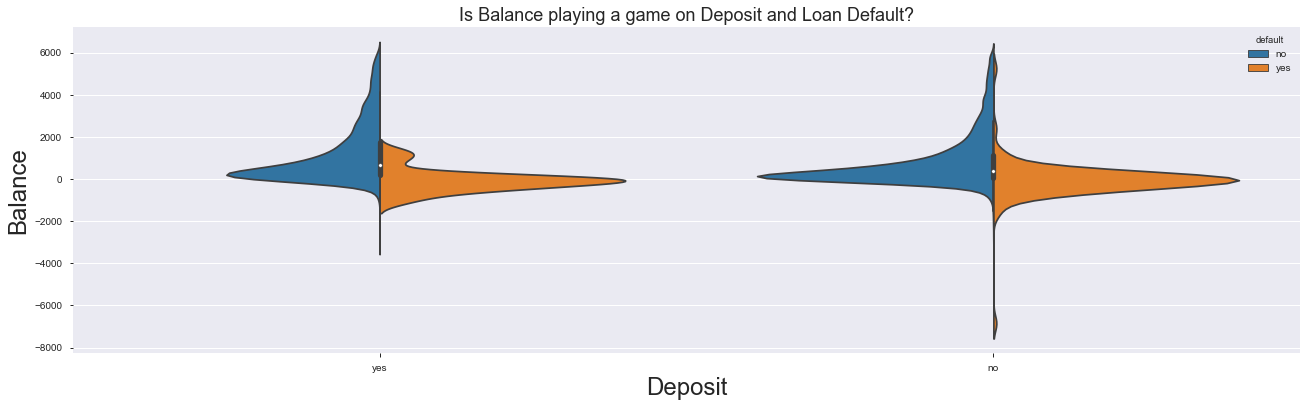

In [12]:
balance_subset75 = raw_dataset[raw_dataset.balance < raw_dataset.balance.quantile(.95)]

fig = plt.figure(figsize=(22, 6))
sns.violinplot(x="deposit",
               y="balance",
               data=balance_subset75,
               hue="default",
               split=True,
               fontsize=16)

plt.title("Is Balance playing a game on Deposit and Loan Default?", fontsize=18)
plt.xlabel("Deposit", fontsize=24)
plt.ylabel("Balance", fontsize=24)

<div class="alert alert-block alert-warning">
<b>Insight:</b> Those who default have low balance in their account
</div>

### Pair plots across Deposit

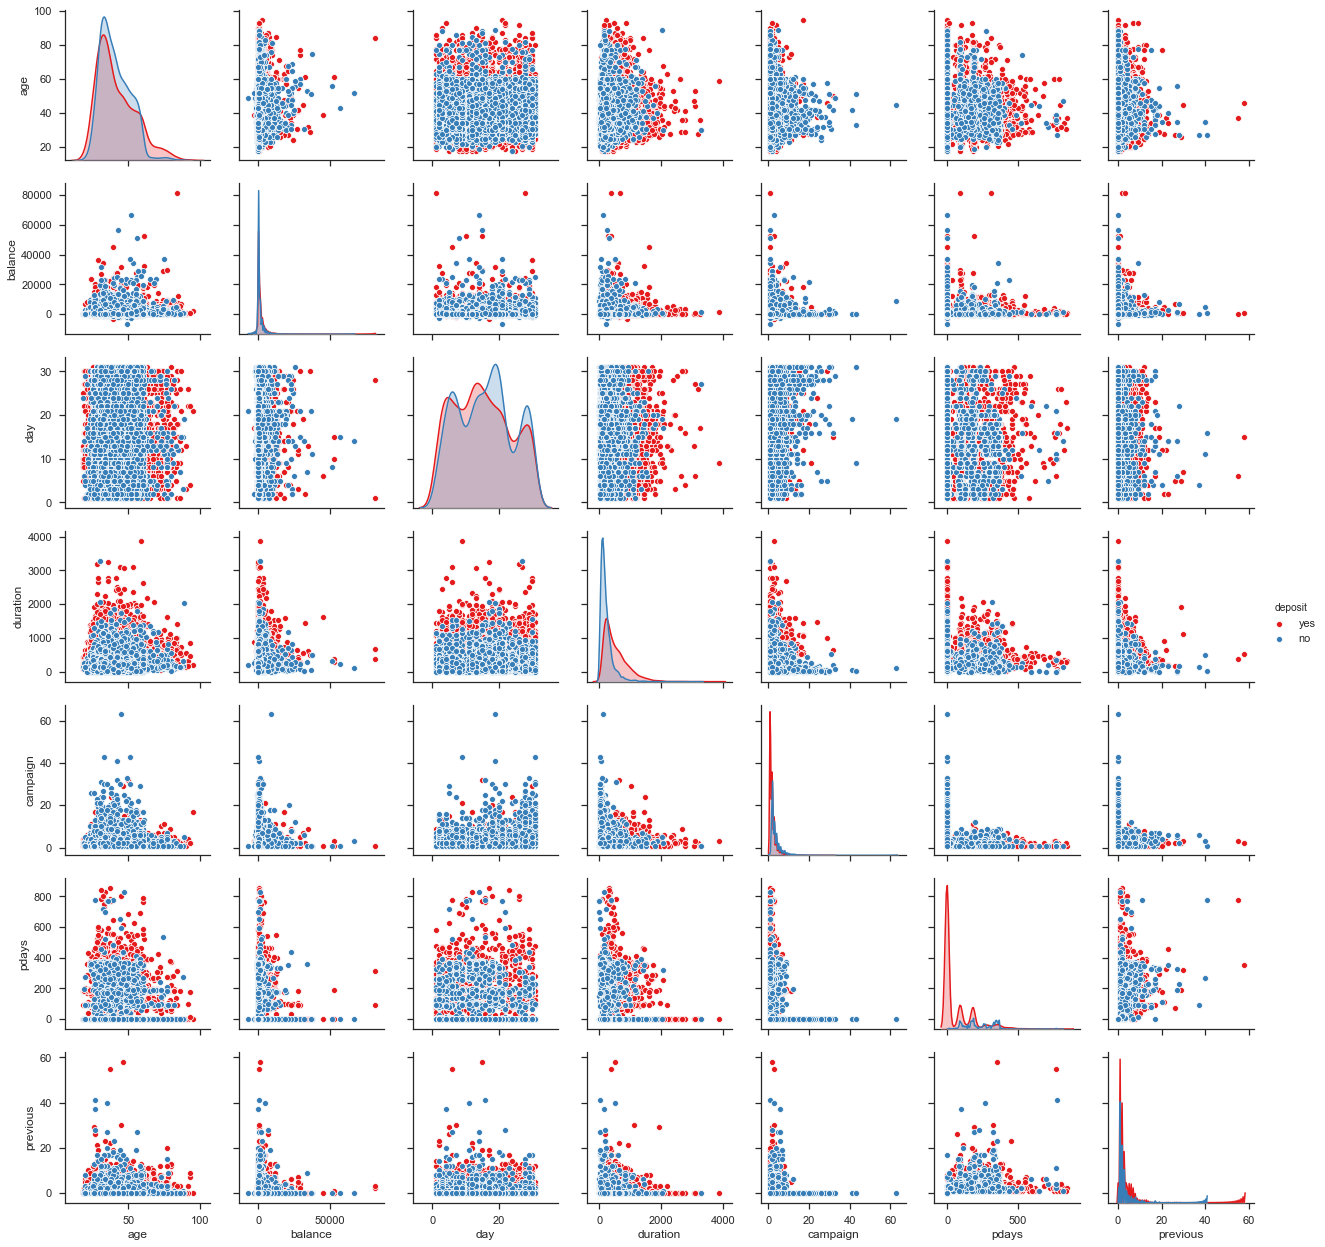

In [13]:
sns.set(style="ticks")

sns.pairplot(raw_dataset, hue="deposit", palette="Set1")
plt.show()

### Pair plots across loan

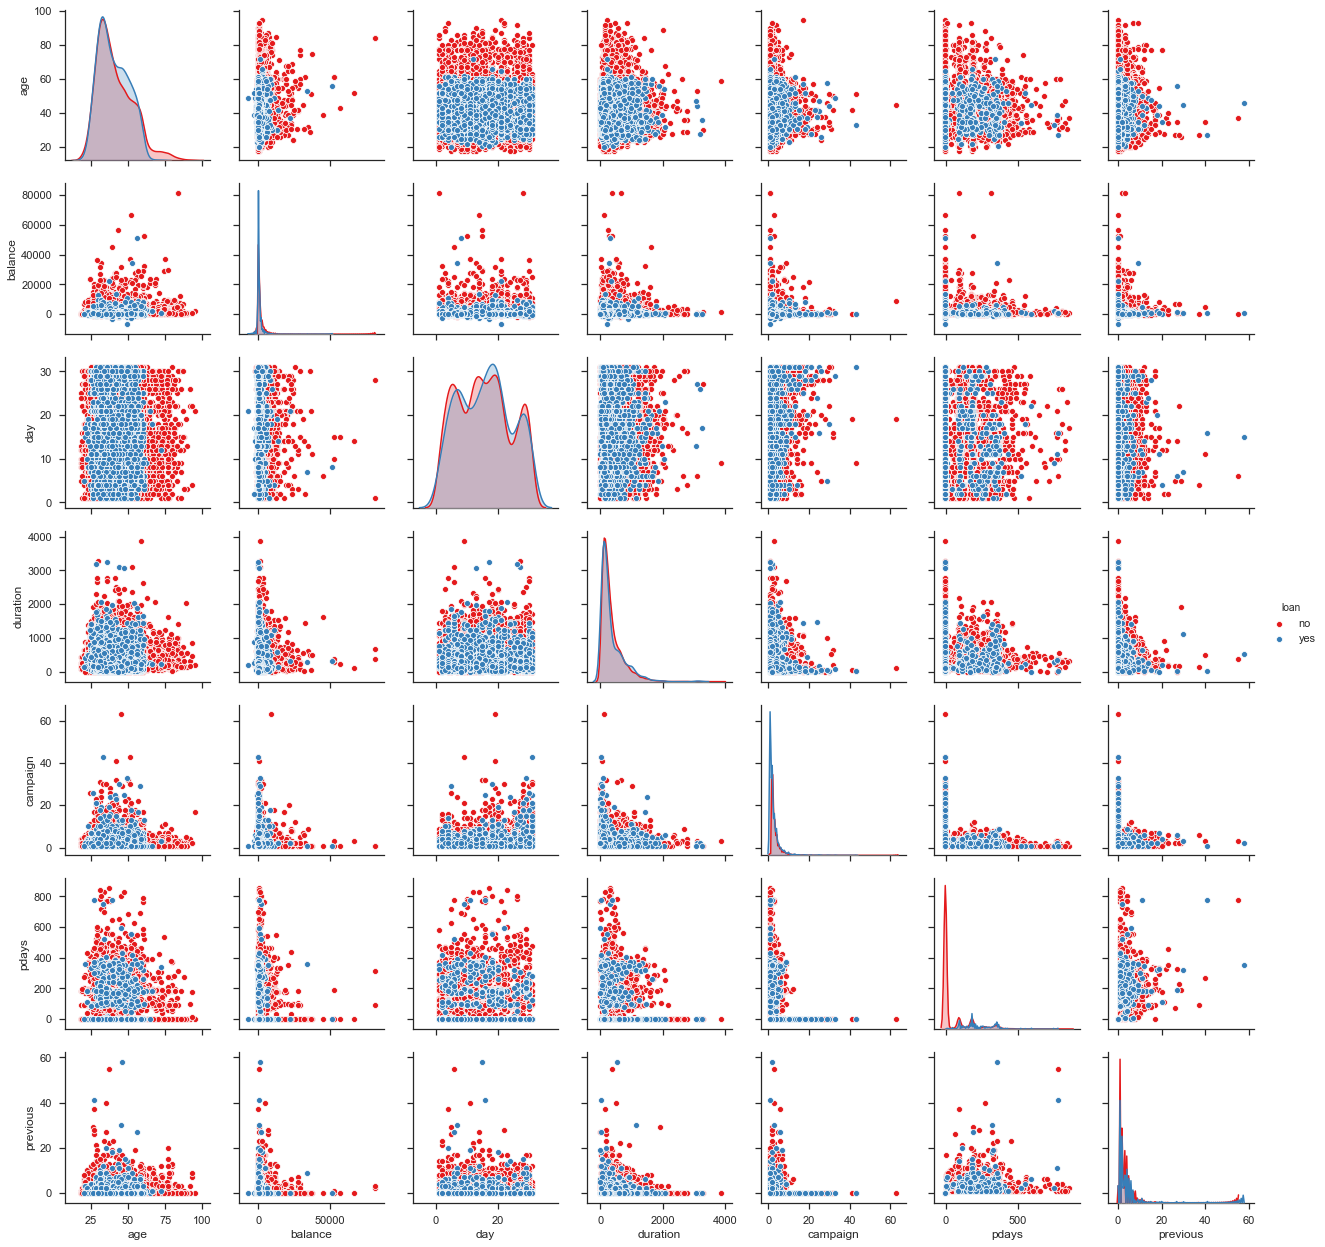

In [14]:
sns.set(style="ticks")

sns.pairplot(raw_dataset, hue="loan", palette="Set1")
plt.show()

### Notes

These plots provide an idea of the distribution of data points across different categories

## Data Pre-processing

#### 3.1 Create target variable

In [15]:
target = [
    1 if i == 'yes' else 0
    for i in raw_dataset['deposit']
]

raw_dataset['target'] = target
raw_dataset['target'].value_counts()

0    5873
1    5289
Name: target, dtype: int64

###  Drop the original target variable column

In [16]:
dataset2=raw_dataset.drop(['deposit'],axis=1)

### Encode the columns containing 'yes' and 'no' values

In [17]:
yes_no_col = ['default', 'housing', 'loan']
for col in yes_no_col:
    dataset2[col + '_bool'] = [1 if i == 'yes' else 0 for i in raw_dataset[col]]

### Drop original columns

In [18]:
dataset3 = dataset2.drop(columns = yes_no_col)

### Convert categorical columns with >2 classes to dummies

In [19]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

for col in  cat_columns:
    dataset3 = pd.concat([dataset3.drop(col, axis=1),
                            pd.get_dummies(dataset3[col], prefix=col, prefix_sep='_',
                                           drop_first=True, dummy_na=False)], axis=1)

### Check correlation

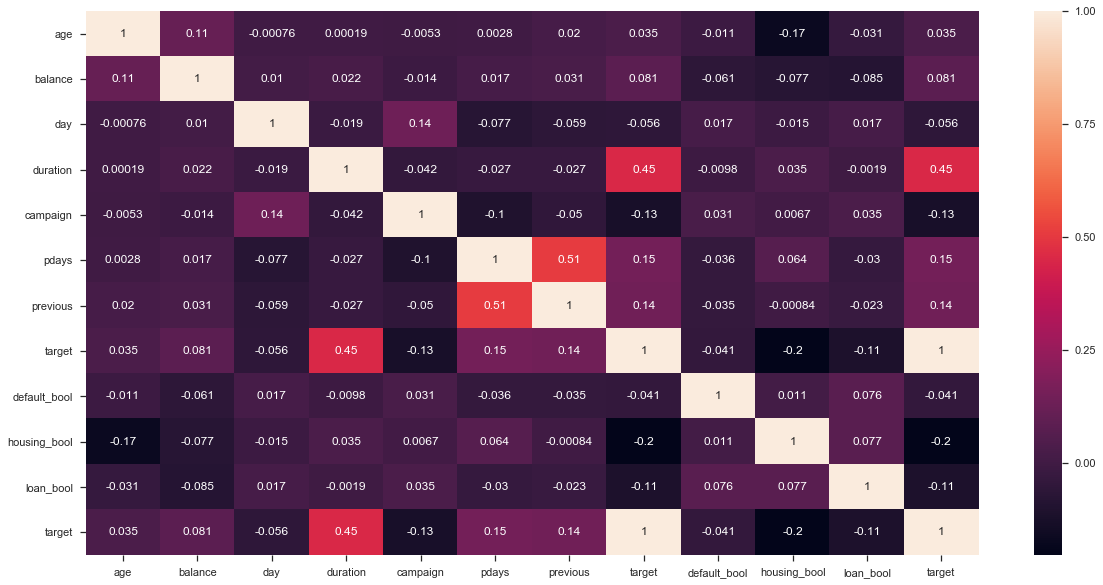

In [20]:
corr_df= dataset3[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'target', 'default_bool', 'housing_bool', 'loan_bool','target']]
plt.figure(figsize=(20,10)) 
sns.heatmap(corr_df.corr(), annot=True) 

None of the variables have high correlation

<div class="alert alert-block alert-warning">
<b>Insight:</b> Since default is imabalanced but still is not correlated with target, there is no need to balance the dataset
</div>

 ### Although there are no missing values, it is good to have an imputer function for future use

In [21]:
num_cols = ["age","balance", "day", "duration", "campaign","pdays", "previous"]


imputer = impute.IterativeImputer()

imputed = imputer.fit_transform(dataset3[num_cols])
dataset3.loc[:, num_cols] = imputed

### Separate features and target

In [22]:
X = dataset3.loc[:,dataset3.columns!='target']
y = dataset3['target']

### Standardization

In [23]:
standardizer = StandardScaler()
X_std = standardizer.fit_transform(X)

### Train and Test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size =0.3, random_state=3)

## Model Building

### Baseline model

In [25]:
baseline_model = DummyClassifier()
baseline_model.fit(X_train, y_train)
baseline_model.score(X_test, y_test) # accuracy

metrics.precision_score(
 y_test, baseline_model.predict(X_test)
)

0.45522855353788355

47.2% accuracy with baseline model

### Shap to understand feature importance & Fairness and Bias

In [26]:
X_shap_df= X[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'default_bool', 'housing_bool', 'loan_bool']]

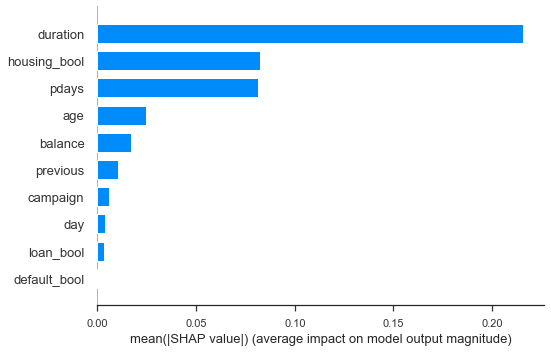

In [27]:
# Build the model with the random forest regression algorithm:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_shap_df, y)
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_shap_df)
shap.summary_plot(shap_values, X_shap_df, plot_type="bar")

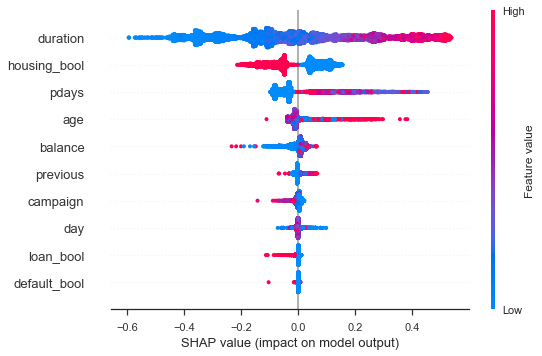

In [28]:
shap.summary_plot(shap_values, X_shap_df)

#### Notes

<br> 1. The y-axis indicates the variable name, in order of importance from top to bottom. 
<br> 2.On the x-axis is the SHAP value. Indicates how much is the change in log-odds. From this number we can extract the probability of success.
<br> 3. Gradient color indicates the original value for that variable. In booleans, it will take two colors, but in number it can contain the whole spectrum.
<br> 4. Each point represents a row from the original dataset.

### LightGBM

In [29]:
#pip install -U scikit-learn
#!pip install bayesian-optimization

In [30]:
# Attempt 1 to solve cannot import name 'cross_validation' from 'sklearn'
from sklearn.model_selection import cross_validate

In [31]:
# Installing package to fix plot_confusion_matrix
#from sklearn import preprocessing, metrics, cross_validation

In [32]:
import sklearn.metrics

In [33]:
#pip install -U scikit-learn

In [34]:
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)

#### Def train_lightgbm_cv

In [35]:
def train_lightgbm_cv(df_train, num_folds):
    folds = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    feature_names = [f for f in df_train.columns if f not in ['target']]

    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df_train[feature_names], df_train['target'])):
        X_train, y_train = df_train[feature_names].iloc[train_idx], df_train['target'].iloc[train_idx]
        X_val, y_val = df_train[feature_names].iloc[valid_idx], df_train['target'].iloc[valid_idx]
        
        # LightGBM parameters found by Bayesian optimization
        clf1 = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            n_jobs=1,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1,
            random_state=42
        )
        clf = LGBMClassifier(
 colsample_by_tree= 0.8604059584835744,
 gbdt_subsample= 0.575276757980238,
 learning_rate= 0.04234563073642076,
 max_depth= 12,
 n_estimators= 23,
 num_leaves= 31,
 reg_lambda= 0.9961713725724278,
            random_state=42
        )
        

        # Fit the model and evaluate with AUC
        clf.fit(X_train,
                y_train,
                eval_set=[(X_train, y_train), (X_val, y_val)],
                eval_metric='auc',
                verbose=1000,
                early_stopping_rounds=200)
        
        clf_score(clf, X_train, y_train, X_val, y_val, train=False)
        
        return clf

#### Defining clf_score

In [36]:
def clf_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

In [37]:
#!pip install lightgbm

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [39]:
# Note for the next step we need to do bayesian optimization

In [40]:
from sklearn import datasets, metrics, model_selection, svm

In [41]:
import matplotlib.pyplot as plt
import numpy
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [42]:
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
     
    classification_report
)

In [43]:
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

In [44]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### Bayesian hyperparameters optimization 

Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[23]	training's auc: 0.921434	training's binary_logloss: 0.439658	valid_1's auc: 0.90592	valid_1's binary_logloss: 0.455798
Validation Result:

accuracy score: 0.8404



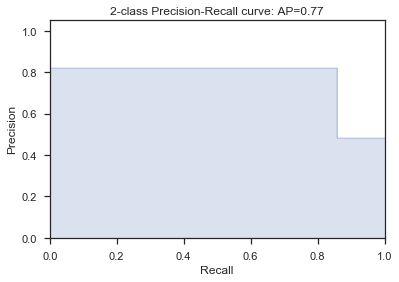

roc auc score: 0.8410129929494949



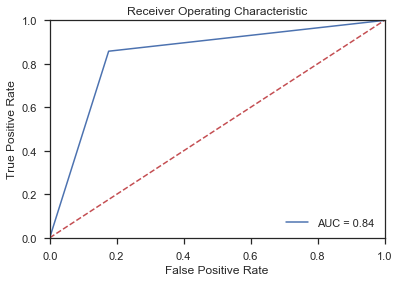

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1931
           1       0.82      0.86      0.84      1790

    accuracy                           0.84      3721
   macro avg       0.84      0.84      0.84      3721
weighted avg       0.84      0.84      0.84      3721


Confusion Matrix: 
 [[1591  340]
 [ 254 1536]]

End of validation Result



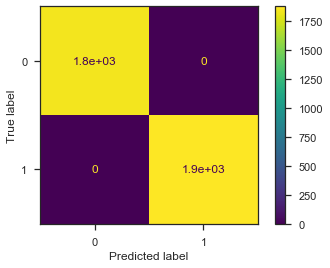

In [45]:
clf_lgbm_cv = train_lightgbm_cv(dataset3, num_folds=3)

#### Feature Importance

In [46]:
def lgbm_feature_importance(df_train, clf, num_folds):
    feature_names = [f for f in df_train.columns if f not in ['target']]
    
    df_fold_importance = pd.DataFrame()
    df_fold_importance["feature"] = feature_names
    df_fold_importance["importance"] = clf.feature_importances_
    df_fold_importance["fold"] = num_folds + 1
    
    df_feature_importance = pd.DataFrame()
    df_feature_importance = pd.concat(
        [df_feature_importance, df_fold_importance], axis=0)
    
    display_lgbm_feature_importances(df_feature_importance)

In [47]:
def display_lgbm_feature_importances(df_feature_importance):
    cols = df_feature_importance[[
        "feature", "importance"
    ]].groupby("feature").mean().sort_values(by="importance",
                                             ascending=False)[:40].index
    best_features = df_feature_importance.loc[
        df_feature_importance.feature.isin(cols)]
    plt.figure(figsize=(15, 12))
    sns.barplot(x="importance",
                y="feature",
                data=best_features.sort_values(by="importance",
                                               ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances.png')

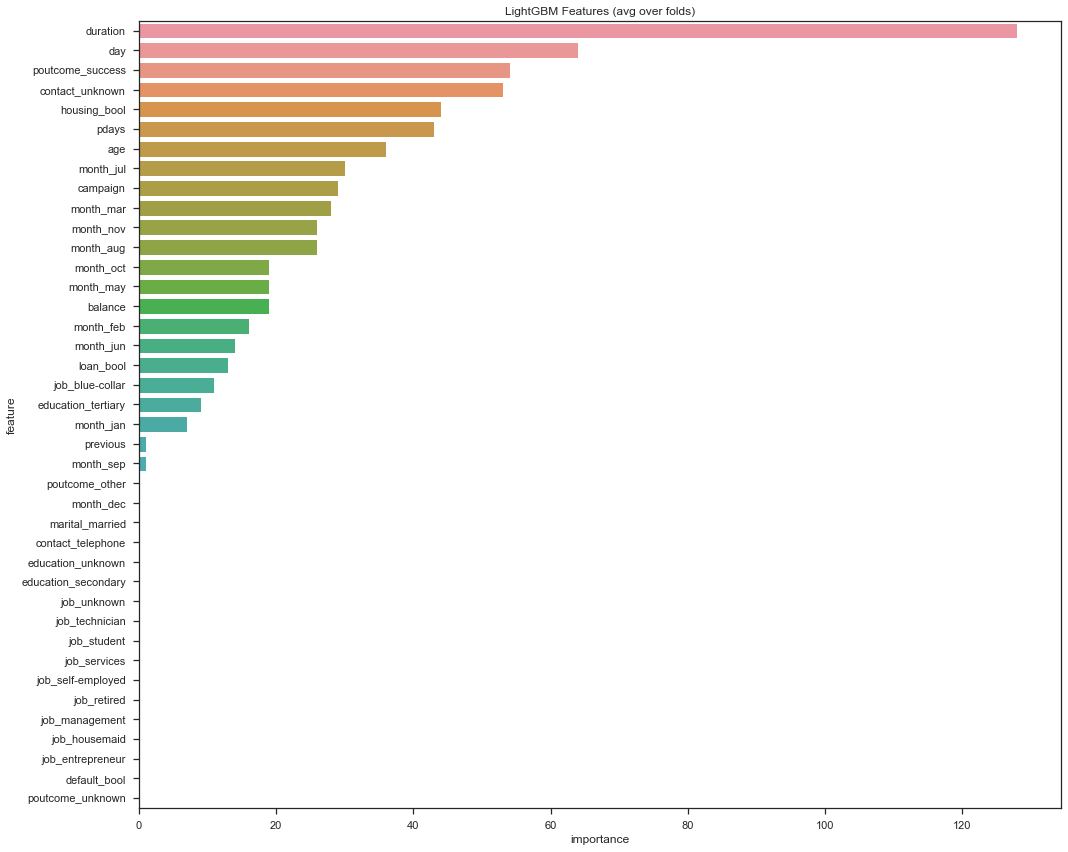

In [48]:
lgbm_feature_importance(dataset3, clf_lgbm_cv, 3)

#### Grid Searching

In [57]:
from hyperopt import tpe
tpe_algorithm = tpe.suggest

In [58]:
from hyperopt import hp, tpe, fmin, Trials
import numpy as np

def objective(args):
    # print just to make sure the parameters are coming through correctly
    print(args)
    return 1

space = {

    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': (hp.quniform('max_depth', 2, 15,1)),
    'n_estimators': (hp.quniform('n_estimators', 5, 35, 1)),
    'num_leaves': hp.quniform('num_leaves', 5, 50, 1),
    #'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
}


bayes_trials = Trials()

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=5, trials=bayes_trials, rstate=np.random.RandomState(50))
best

{'colsample_bytree': 0.6834049676375196, 'learning_rate': 0.04234563073642076, 'max_depth': 12.0, 'n_estimators': 23.0, 'num_leaves': 31.0, 'reg_lambda': 0.9961713725724278}
{'colsample_bytree': 0.7700755395235527, 'learning_rate': 0.012595086142431277, 'max_depth': 14.0, 'n_estimators': 20.0, 'num_leaves': 25.0, 'reg_lambda': 0.8609895558337869}
{'colsample_bytree': 0.8292029027192476, 'learning_rate': 0.027683124895774038, 'max_depth': 10.0, 'n_estimators': 32.0, 'num_leaves': 49.0, 'reg_lambda': 0.7471784500414423}
{'colsample_bytree': 0.8753993277779191, 'learning_rate': 0.4457703286818158, 'max_depth': 12.0, 'n_estimators': 19.0, 'num_leaves': 8.0, 'reg_lambda': 0.407649194556314}
{'colsample_bytree': 0.6779967723231518, 'learning_rate': 0.0985234463272457, 'max_depth': 2.0, 'n_estimators': 11.0, 'num_leaves': 45.0, 'reg_lambda': 0.007560711306669354}
100%|████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 179.06trial/s, best loss: 1.0]


{'colsample_by_tree': 0.6834049676375196,
 'learning_rate': 0.04234563073642076,
 'max_depth': 12.0,
 'n_estimators': 23.0,
 'num_leaves': 31.0,
 'reg_lambda': 0.9961713725724278}

### XGBoost

In [69]:
#! pip install graphviz

In [70]:
#X_train

In [71]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [72]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("XG Boost Accuracy: ",accuracy_score(y_test, y_pred))

XG Boost Accuracy:  0.835771872200657


### AdaBoost

In [73]:
#conda upgrade scikit-learn

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
adaboost = AdaBoostClassifier(n_estimators=40,algorithm="SAMME").fit(X_train,y_train)
#scoresada= cross_val_score(adaboost, features_title, labels, cv=5)
#np.average(scoresada)
y_pred= adaboost.predict(X_test)
y_probas = adaboost.predict_proba(X_test)
round(accuracy_score(y_test, y_pred),2)

0.81

### Neural Networks (LSTM)

In [76]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [77]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu'))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid'))
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [78]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train.values, batch_size=25, epochs=25)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/25
7813/7813 [==============================] - 1s 70us/step - loss: 0.6900 - accuracy: 0.5751
Epoch 2/25
7813/7813 [==============================] - 0s 53us/step - loss: 0.5872 - accuracy: 0.6863
Epoch 3/25
7813/7813 [==============================] - 0s 53us/step - loss: 0.4819 - accuracy: 0.7669
Epoch 4/25
7813/7813 [==============================] - 0s 50us/step - loss: 0.4186 - accuracy: 0.8070
Epoch 5/25
7813/7813 [==============================] - 0s 52us/step - loss: 0.3922 - accuracy: 0.8264
Epoch 6/25
7813/7813 [==============================] - 0s 56us/step - loss: 0.3810 - accuracy: 0.8311
Epoch 7/25
7813/7813 [==============================] - 0s 52us/step - loss: 0.3738 - accuracy: 0.8353
Epoch 8/25
7813/7813 [==============================] - 0s 56us/step - loss: 0.3680 - accuracy: 0.8377
Epoch 9/25
7813/7813 [==============================] - 0s 54us/step - loss: 0.36

In [79]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

7813/7813 [==============================] - 0s 20us/step


[0.344439446025906, 0.8498656153678894]

In [80]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)
print(confusion_matrix(y_test, y_pred))


[[1398  376]
 [ 213 1362]]


## Automated Machine Learning

### TPOT

In [81]:
#! pip install tpot
from tpot import TPOTClassifier


In [ ]:
# https:"/epistasislab.github.io/tpot/using/#built-in-tpot-configurations
tpot = TPOTClassifier(generations=10, population_size=20, verbosity=2,
 random_state=42, config_dict='TPOT light')
tpot.fit(X_train, y_train)

#tpot.export('tpot_exported_pipeline2.py') 

Generation 1 - Current best internal CV score: 0.8261872052415697
Generation 2 - Current best internal CV score: 0.8292587959561007
Generation 3 - Current best internal CV score: 0.8292587959561007
Generation 4 - Current best internal CV score: 0.8309225094064651


In [83]:
print(tpot.score(X_test, y_test))
#tpot.export('tpot_exported_pipeline2.py')

0.8181546730367274


### AutoML H20 AI

In [1]:
#Installation of Packages
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

     |████████████████████████████████| 51kB 609kB/s eta 0:00:01
  Created wheel for tabulate: filename=tabulate-0.8.6-cp37-none-any.whl size=23274 sha256=acf8403042cea87749e1273067329c3be7f60c9ccc6dd8baddd61ab96d7d3341
  Stored in directory: /Users/SK-MBP/Library/Caches/pip/wheels/9c/9b/f4/eb243fdb89676ec00588e8c54bb54360724c06e7fafe95278e
Successfully built tabulate
^C
ERROR: Operation cancelled by user


In [3]:
#Import packages
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from C:\Users\Sherry\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Sherry\AppData\Local\Temp\tmpwmfvs9a8
  JVM stdout: C:\Users\Sherry\AppData\Local\Temp\tmpwmfvs9a8\h2o_Sherry_started_from_python.out
  JVM stderr: C:\Users\Sherry\AppData\Local\Temp\tmpwmfvs9a8\h2o_Sherry_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,8 days
H2O cluster name:,H2O_from_python_Sherry_1c7xoy
H2O cluster total nodes:,1
H2O cluster free memory:,3.973 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [4]:
#Import Dataset
raw_dataset = h2o.import_file("C:\\Users\\Sherry\\Desktop\\bank.csv")
raw_dataset.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,1
56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,1
60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,1
37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,1
28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,1


In [5]:
raw_dataset.describe()

Rows:11162
Cols:17




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,int
mins,18.0,,,,,-6847.0,,,,1.0,,2.0,1.0,-1.0,0.0,,0.0
mean,41.231947679627304,,,,,1528.5385235620856,,,,15.658036194230426,,371.99381831213043,2.508421429851281,51.33040673714388,0.8325568894463358,,0.4738398136534671
maxs,95.0,,,,,81204.0,,,,31.0,,3881.0,63.0,854.0,58.0,,1.0
sigma,11.913369192215526,,,,,3225.413325946151,,,,8.420739541006451,,347.1283857163058,2.722077181661486,108.75828197197697,2.2920072186705047,,0.4993375439121514
zeros,0,,,,,774,,,,0,,0,0,0,8324,,5873
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1.0,-1.0,0.0,unknown,1.0
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1.0,-1.0,0.0,unknown,1.0
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1.0,-1.0,0.0,unknown,1.0


In [6]:
#convert Target to enum
raw_dataset['deposit'] = raw_dataset['deposit'].asfactor()

In [7]:
raw_dataset.head()

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,1
56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,1
60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,1
37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,1
28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,1


In [8]:
raw_dataset.describe()

Rows:11162
Cols:17




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-6847.0,,,,1.0,,2.0,1.0,-1.0,0.0,,
mean,41.231947679627304,,,,,1528.5385235620856,,,,15.658036194230426,,371.99381831213043,2.508421429851281,51.33040673714388,0.8325568894463358,,
maxs,95.0,,,,,81204.0,,,,31.0,,3881.0,63.0,854.0,58.0,,
sigma,11.913369192215526,,,,,3225.413325946151,,,,8.420739541006451,,347.1283857163058,2.722077181661486,108.75828197197697,2.2920072186705047,,
zeros,0,,,,,774,,,,0,,0,0,0,8324,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1.0,-1.0,0.0,unknown,1
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1.0,-1.0,0.0,unknown,1
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1.0,-1.0,0.0,unknown,1


In [9]:
#Train Test Split
splits = raw_dataset.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]


In [10]:
splits[0]

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,1
56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,1
60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,1
37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,1
38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,1
30,blue-collar,married,secondary,no,309,yes,no,unknown,7,may,1574,2,-1,0,unknown,1


In [11]:
#Defining Features and Target
y = "deposit"
x  = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']

In [12]:
# H2O Model
aml = H2OAutoML(max_models = 25, max_runtime_secs=300, seed = 1)
aml.train(x = x, y = y, training_frame = train)

AutoML progress: |
14:03:07.178: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [13]:
#Leaderboard
lb = aml.leaderboard
lb.head()
lb.head(rows=lb.nrows) # Entire leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200214_140307,0.927899,0.33529,0.89438,0.131122,0.31992,0.102349
StackedEnsemble_BestOfFamily_AutoML_20200214_140307,0.927427,0.335383,0.892893,0.132205,0.320122,0.102478
GBM_5_AutoML_20200214_140307,0.927411,0.330163,0.891286,0.133382,0.318312,0.101323
GBM_3_AutoML_20200214_140307,0.926513,0.333499,0.89158,0.132204,0.319784,0.102262
GBM_1_AutoML_20200214_140307,0.925984,0.334558,0.890969,0.134676,0.320617,0.102795
GBM_2_AutoML_20200214_140307,0.925285,0.335635,0.886999,0.133757,0.320596,0.102782
GBM_4_AutoML_20200214_140307,0.92415,0.340764,0.887306,0.137503,0.323473,0.104635
GBM_grid__1_AutoML_20200214_140307_model_8,0.92258,0.355628,0.889748,0.144343,0.329676,0.108686
GBM_grid__1_AutoML_20200214_140307_model_2,0.922399,0.346638,0.886594,0.14125,0.327263,0.107101
DRF_1_AutoML_20200214_140307,0.920628,0.377086,0.862076,0.137708,0.327226,0.107077


In [14]:
preds = aml.predict(test)
preds

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p0,p1
1,0.141787,0.858213
1,0.196454,0.803546
0,0.876268,0.123732
1,0.122358,0.877642
0,0.928681,0.0713189
1,0.0923758,0.907624
1,0.286828,0.713172
1,0.188755,0.811245
1,0.528146,0.471854
1,0.0870629,0.912937


In [15]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [16]:
metalearner.coef_norm()

{'Intercept': -0.32241276786905404,
 'GBM_5_AutoML_20200214_140307': 0.8335929245499633,
 'GBM_3_AutoML_20200214_140307': 0.33542864089943625,
 'GBM_1_AutoML_20200214_140307': 0.30381287113397754,
 'GBM_2_AutoML_20200214_140307': 0.13203629119091118,
 'GBM_4_AutoML_20200214_140307': 0.0,
 'GBM_grid__1_AutoML_20200214_140307_model_8': 0.0,
 'GBM_grid__1_AutoML_20200214_140307_model_2': 0.0,
 'DRF_1_AutoML_20200214_140307': 0.3247121234647919,
 'XRT_1_AutoML_20200214_140307': 0.31291066587815664,
 'GBM_grid__1_AutoML_20200214_140307_model_6': 0.0,
 'GBM_grid__1_AutoML_20200214_140307_model_4': 0.017604162436699634,
 'GBM_grid__1_AutoML_20200214_140307_model_7': 0.0,
 'GBM_grid__1_AutoML_20200214_140307_model_3': 0.0,
 'GBM_grid__1_AutoML_20200214_140307_model_1': 0.13229895789652854,
 'GLM_1_AutoML_20200214_140307': 0.0,
 'GBM_grid__1_AutoML_20200214_140307_model_5': 0.0,
 'DeepLearning_grid__1_AutoML_20200214_140307_model_3': 0.0056610058501196945,
 'DeepLearning_1_AutoML_20200214_14030

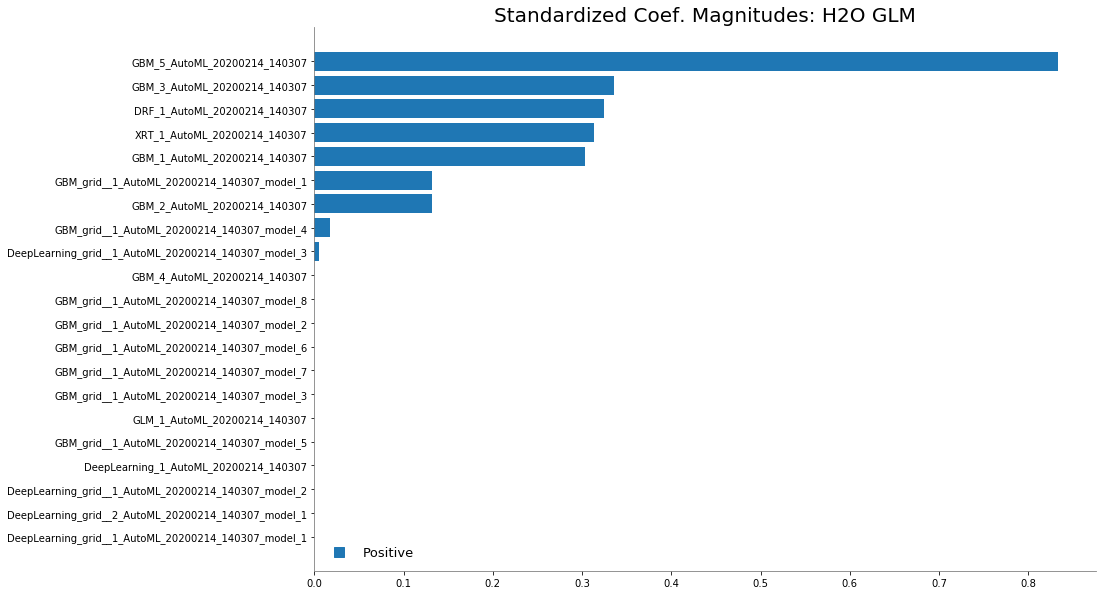

In [17]:
#Plot
%matplotlib inline
metalearner.std_coef_plot()

In [20]:
#Final Results
perf = aml.leader.model_performance(test)
print(perf)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.10007260747441912
RMSE: 0.31634254768275977
LogLoss: 0.32695656128314315
Null degrees of freedom: 2196
Residual degrees of freedom: 2187
Null deviance: 3039.0471678396407
Residual deviance: 1436.6471302781313
AIC: 1456.6471302781313
AUC: 0.9327583741880999
AUCPR: 0.8998959458471526
Gini: 0.8655167483761999

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3468797363663131: 


,,0,1,Error,Rate
0,0,945.0,214.0,0.1846,(214.0/1159.0)
1,1,74.0,964.0,0.0713,(74.0/1038.0)
2,Total,1019.0,1178.0,0.1311,(288.0/2197.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.346880,0.870036,249.0
1,max f2,0.121323,0.922057,326.0
2,max f0point5,0.634387,0.853849,170.0
3,max accuracy,0.346880,0.868912,249.0
4,max precision,0.948004,1.000000,0.0
5,max recall,0.054121,1.000000,367.0
6,max specificity,0.948004,1.000000,0.0
7,max absolute_mcc,0.346880,0.744891,249.0
8,max min_per_class_accuracy,0.589256,0.860224,184.0
9,max mean_per_class_accuracy,0.346880,0.872034,249.0



Gains/Lift Table: Avg response rate: 47.25 %, avg score: 47.60 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010014,0.942582,2.116570,2.116570,1.000000,0.945579,1.000000,0.945579,0.021195,0.021195,111.657033,111.657033
1,,2,0.020027,0.940139,2.020363,2.068466,0.954545,0.941472,0.977273,0.943525,0.020231,0.041426,102.036259,106.846646
2,,3,0.030041,0.937955,2.020363,2.052432,0.954545,0.938809,0.969697,0.941953,0.020231,0.061657,102.036259,105.243183
3,,4,0.040055,0.936482,2.020363,2.044415,0.954545,0.937219,0.965909,0.940770,0.020231,0.081888,102.036259,104.441452
4,,5,0.050068,0.934407,2.116570,2.058846,1.000000,0.935339,0.972727,0.939684,0.021195,0.103083,111.657033,105.884568
5,,6,0.100137,0.926144,2.001121,2.029983,0.945455,0.930208,0.959091,0.934946,0.100193,0.203276,100.112104,102.998336
6,,7,0.150205,0.916140,1.924155,1.994707,0.909091,0.921775,0.942424,0.930555,0.096339,0.299615,92.415484,99.470719
7,,8,0.200273,0.906633,1.866430,1.962638,0.881818,0.911702,0.927273,0.925842,0.093449,0.393064,86.643020,96.263794
8,,9,0.299954,0.872781,1.836294,1.920651,0.867580,0.891577,0.907436,0.914455,0.183044,0.576108,83.629389,92.065107
9,,10,0.400091,0.779694,1.674015,1.858922,0.790909,0.834574,0.878271,0.894462,0.167630,0.743738,67.401471,85.892183


### Google Automl ML

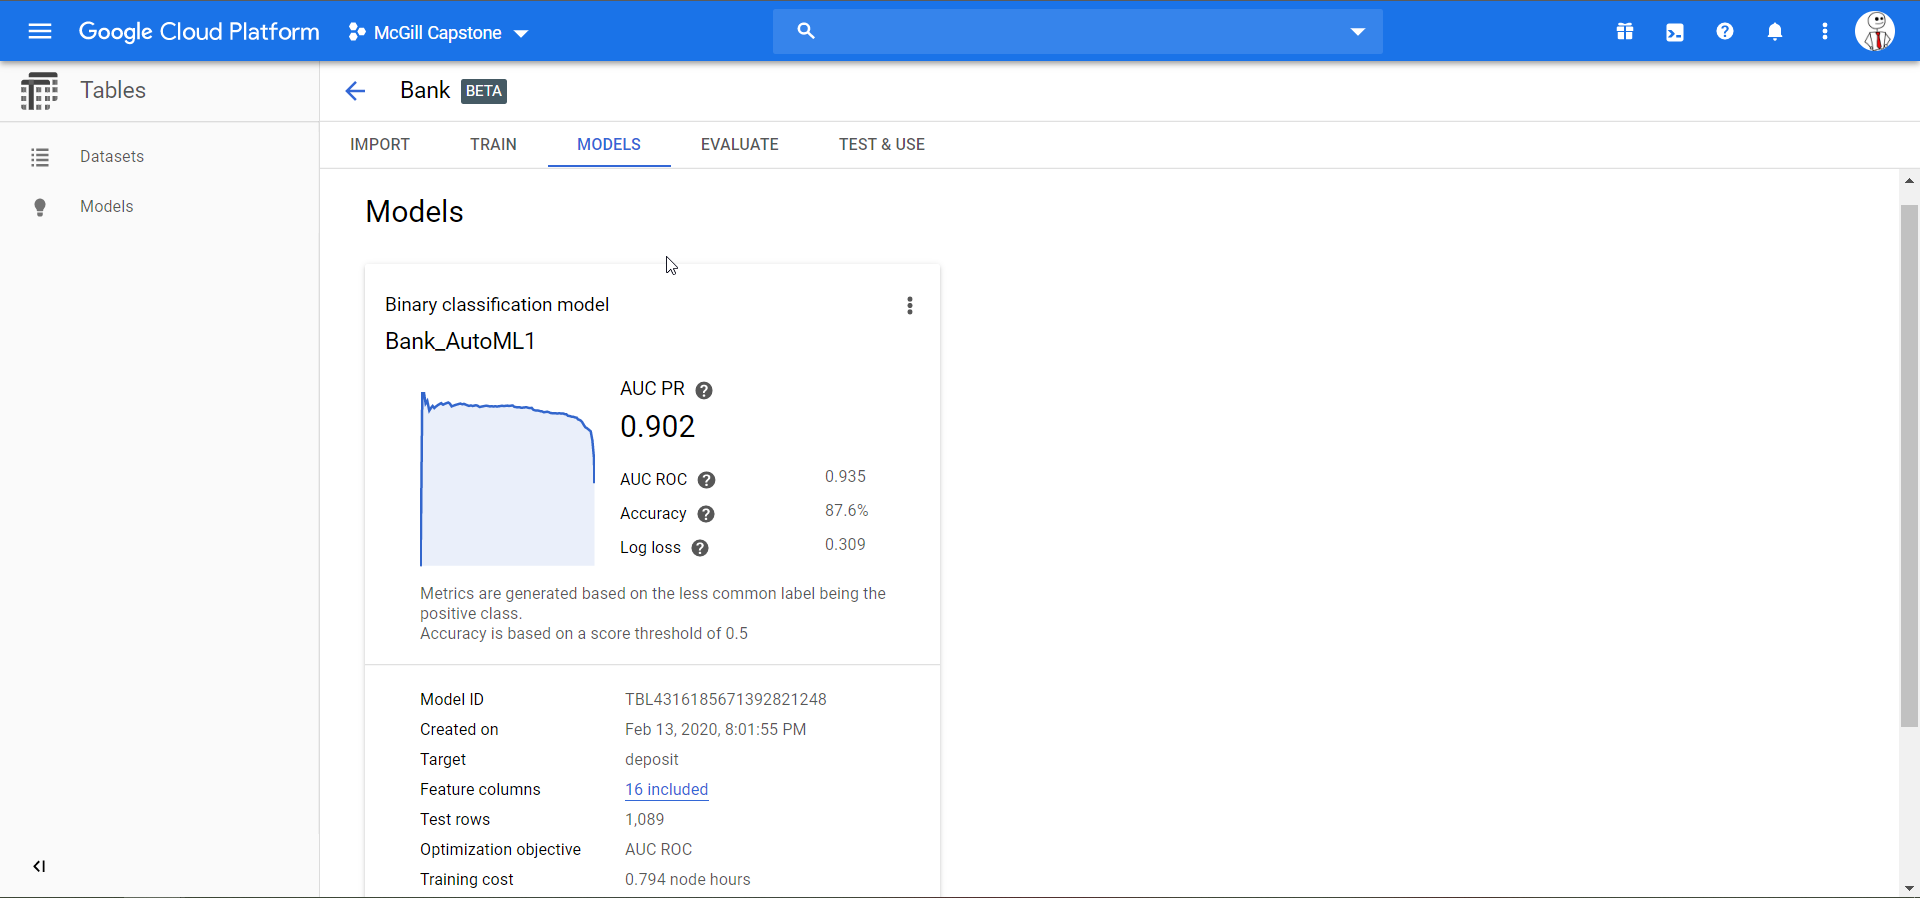

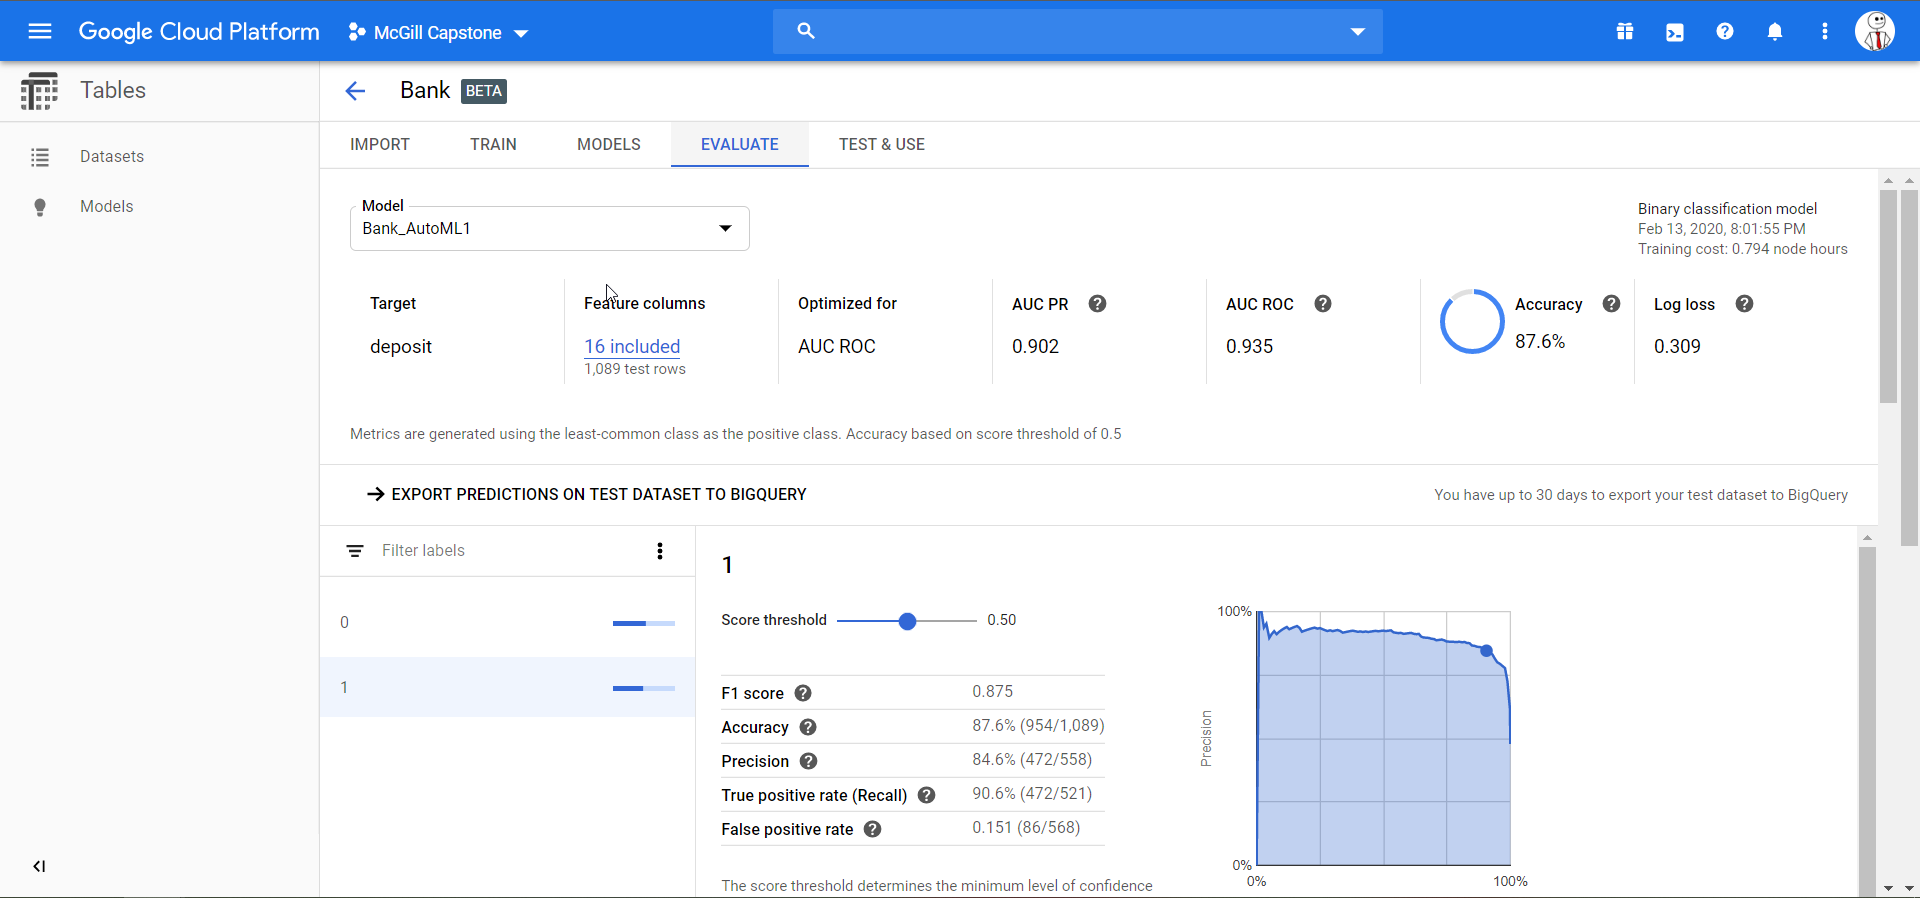

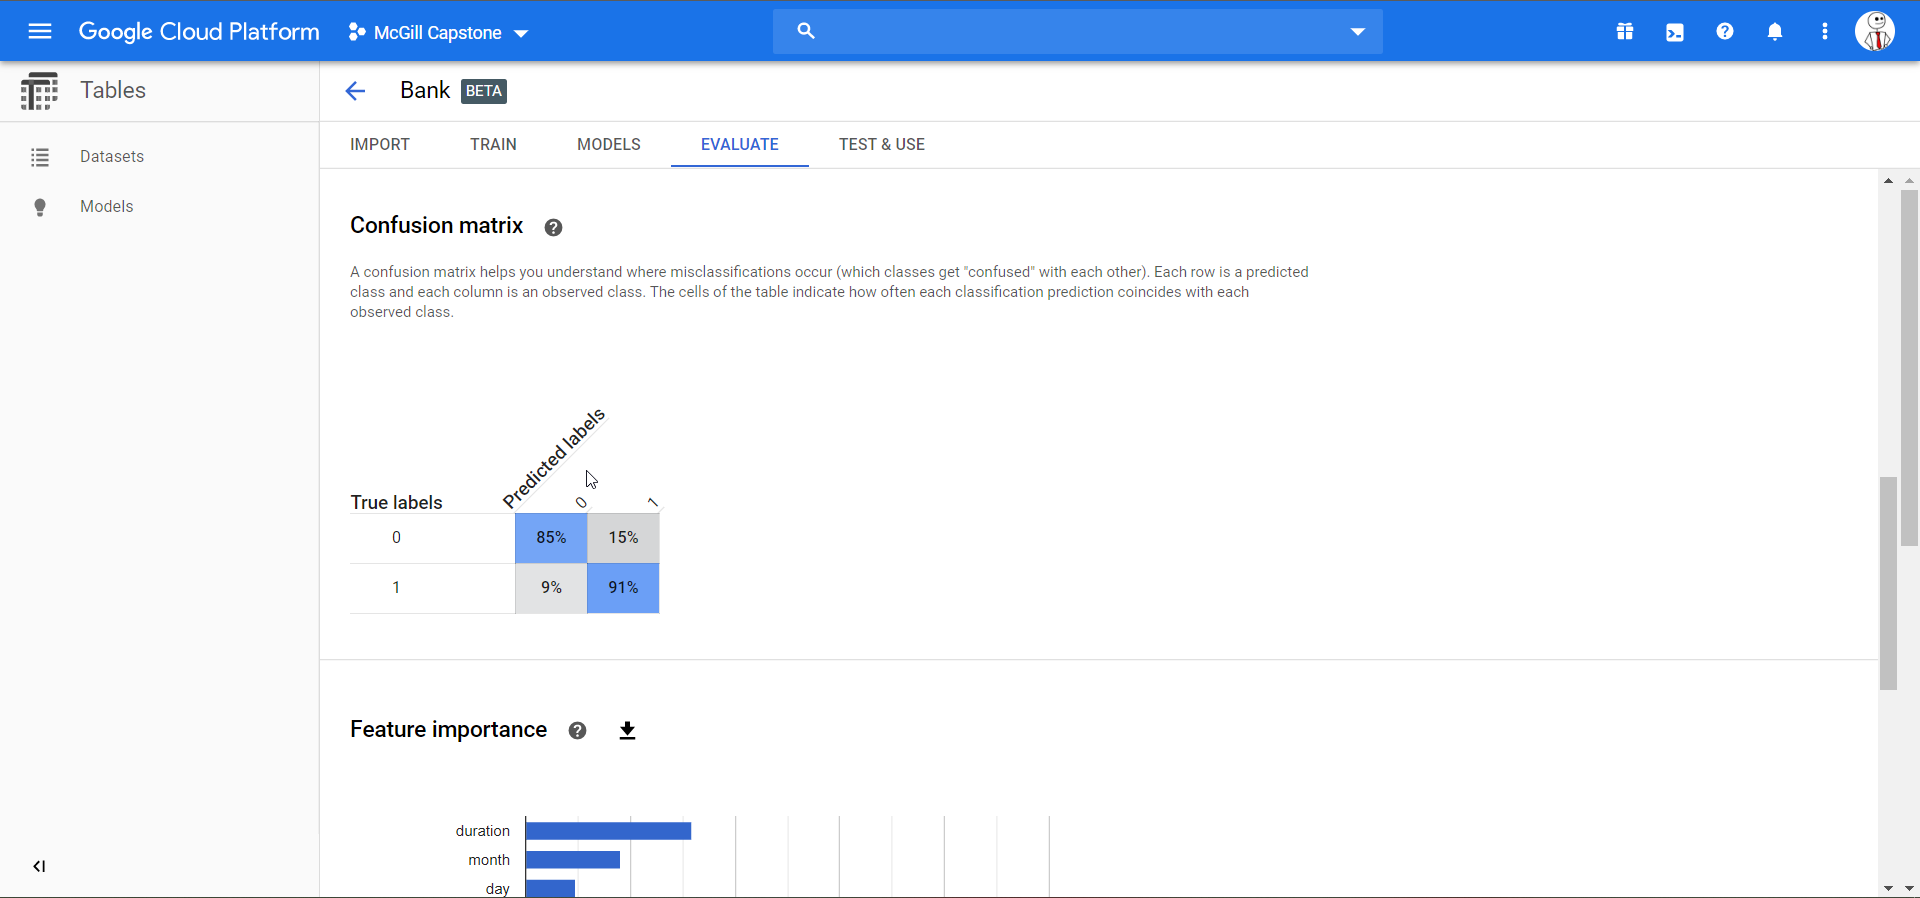

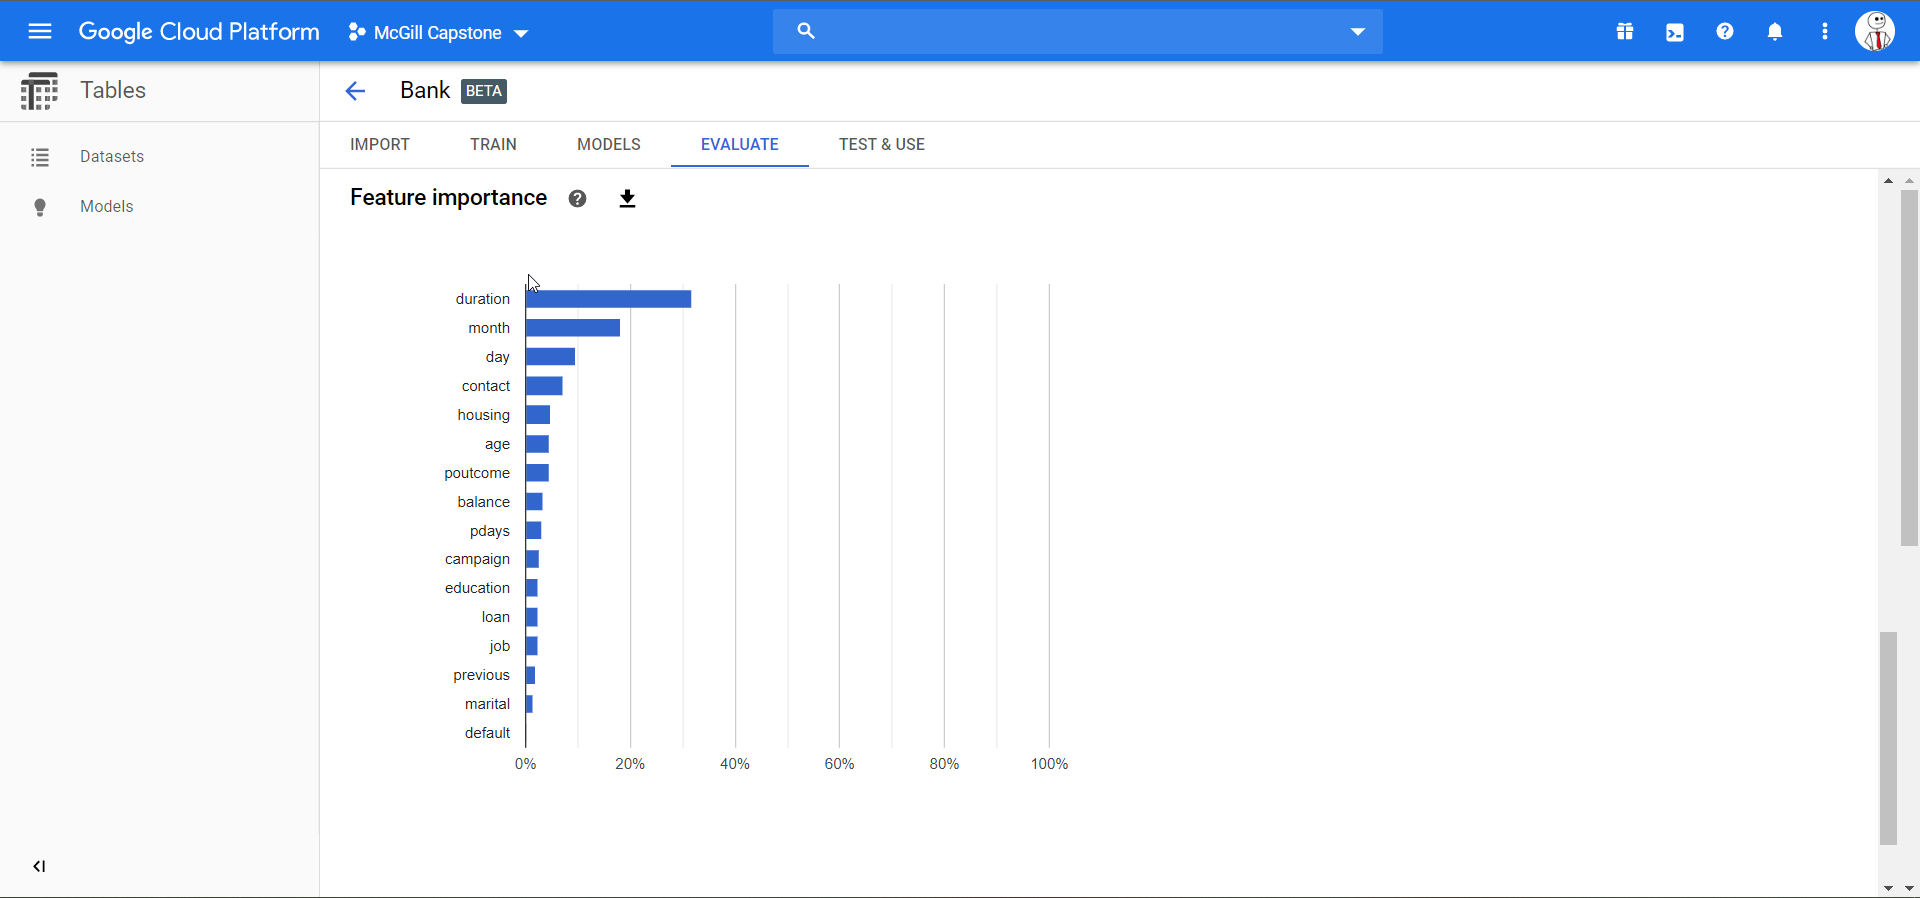

## Understanding Causal Inference


### Chi-Square 

To evalaue the impact of the bank's marketing campaign, we decided to perform a chi-sqaure for indepence. Our goal is to observe if people were inclined to make deposits both before and afer a marketing campaign. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import ShuffleSplit
import random
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
%matplotlib inline

In [143]:
df = pd.read_csv("/Users/SK-MBP/Documents/MMA/EnterpriseAnalytics/FinalProject/bank.csv") 

In [144]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [145]:
df  = df.sample(frac = 1 )


In [146]:
df = np.split(df, [int(0.8 * len(df))], axis=0)

In [147]:
len(df)

2

In [148]:
before = pd.DataFrame(df[0])
after = pd.DataFrame(df[1])
bf_index[0]

6261

In [149]:
# yes_no_col = ['deposit']
# for col in yes_no_col:
#     before["deposit_bool"] = [1 if i == 'yes' else 0 for i in before["deposit"]]
# before_mod = [len(before), (before["deposit_bool"].sum())]

# yes_no_col = ['deposit']
# for col in yes_no_col:
#     after["deposit_bool"] = [1 if i == 'yes' else 0 for i in after["deposit"]]
# after_mod = [len(after), (after["deposit_bool"].sum())]

In [150]:
bf_index = before.index.values
af_index = after.index.values
df_final = pd.read_csv("/Users/SK-MBP/Documents/MMA/EnterpriseAnalytics/FinalProject/bank.csv") 
#df_final["state"] = df_final[[bf_index] == "before"]
df_final["state"]  = df_final["campaign"]
for i in bf_index:
    #df_final.iloc[bf_index[i], df.columns.get_loc('state')] == "before"
    df_final.iloc[i,df_final.columns.get_loc('state')] = "0"
for i in af_index:
    #df_final.iloc[bf_index[i], df.columns.get_loc('state')] == "before"
    df_final.iloc[i,df_final.columns.get_loc('state')] = "1"

In [151]:
df_final.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,state
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,0
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0


In [152]:
#df_final["depsoit_dum"]  = df_final["depoit_dum"]
#for i in len(df_final)
    #df_final.iloc[bf_index[i], df.columns.get_loc('state')] == "before"
    #df_final.iloc[i,df_final.columns.get_loc('depsoit_dum')] = "0"
    
df_final["deposit_bool"] = df_final["deposit"].replace("yes", 1)
df_final["deposit_bool"] = df_final["deposit"].replace("no", 0)
    #if df_final["deposit"] ==  "yes":
 #   df_final["deposit_dum"]  = 1

In [153]:
contingency_table = pd.crosstab(
    df_final["state"],
    df_final["deposit_bool"],
    margins = True
)
contingency_table

deposit_bool,0,yes,All
state,,,
0,4717,4212,8929
1,1156,1077,2233
All,5873,5289,11162


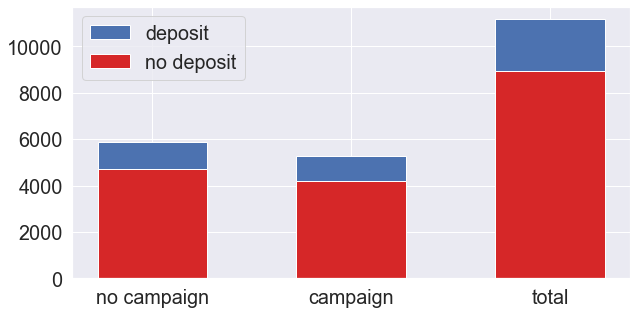

In [154]:
before_camp = contingency_table.iloc[0][0:6].values
after_camp = contingency_table.iloc[1][0:6].values

# #Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["no campaign","campaign","total"]
p1 = plt.bar(categories, before_camp, 0.55, color='#d62728')
p2 = plt.bar(categories, after_camp, 0.55, bottom=before_camp)
plt.legend((p2[0], p1[0]), ('deposit', 'no deposit'))
plt.xlabel('')
plt.ylabel('')
plt.show()

In [155]:
f_obs = np.append(contingency_table.iloc[0][0:6].values, contingency_table.iloc[1][0:6].values)
f_obs



array([4717, 4212, 8929, 1156, 1077, 2233])

In [156]:
row_sums = [0,0]
row_sums[0] = contingency_table.iloc[0,2]
row_sums[1] = contingency_table.iloc[1,2]
row_sums


[8929, 2233]

In [157]:
f_obs = np.array([contingency_table.iloc[0][0:6].values,
                  contingency_table.iloc[1][0:6].values])
f_obs

array([[4717, 4212, 8929],
       [1156, 1077, 2233]])

In [158]:
stats.chi2_contingency(f_obs)[0:3]

(0.8034254731496187, 0.6691729469956214, 2)

### Do Why: Double Machine Learning for Causal Inference 

In [65]:
#import relevant packages
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
from dowhy import plotter

Please enter the path where you have saved the data set below

In [66]:
df = pd.read_csv("/Users/SK-MBP/Documents/MMA/EnterpriseAnalytics/FinalProject/bank.csv") 

In [67]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Setting classification parameter for Startification Approach



In [68]:
#df["deposit_bool"] = df["deposit"]
#df["deposit_bool"].unique()
#df["deposit_bool"] = df["deposit"].replace("yes",1)
#df["deposit_bool"]= df["deposit"].transform(lambda x: True if x == "yes" else False)
df["deposit_bool"]= df["deposit"].transform(lambda x: 1 if x == "yes" else 0)
#df["deposit_bool"]= df["deposit"].transform(lambda x: 1 if x == "yes" else 0)
#df["deposit_bool"].transform(lambda x: False if x == "no")
#df["deposit_bool"] = df["deposit"].replace("no",0)
#df["deposit_bool"].astype("int")
#pd.to_numeric(df.iloc[:,-1])
#df['deposit_bool'] = np.where(df['deposit_bool'] >= np.mean(df['deposit_bool']),True,False) 
df['age'] = np.where(df['age'] >= np.mean(df['age']),True,False) 
df.tail()
#df["education"].unique()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_bool
11157,False,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,0
11158,False,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,0
11159,False,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,0
11160,True,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,0
11161,False,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no,0


Choosing features for treatment and causal analysis

In [69]:
common_causes_names = ["job","balance","education","default","housing","loan"]
treatment_names = ['age']
outcome_name = ['deposit_bool']
instrument_names = ["marital","contact","day","month","duration","campain","pdays","previous"]

In [70]:
df.dtypes

age               bool
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
deposit         object
deposit_bool     int64
dtype: object

In [71]:
model=CausalModel(
        data = df,
        treatment=treatment_names,
        outcome=outcome_name,
        common_causes = common_causes_names)


INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['age'] on outcome ['deposit_bool']


INFO:dowhy.causal_graph:Using Matplotlib for plotting
/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


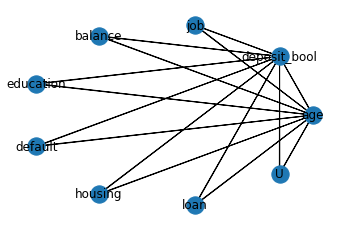

In [72]:
model.view_model(layout="dot")

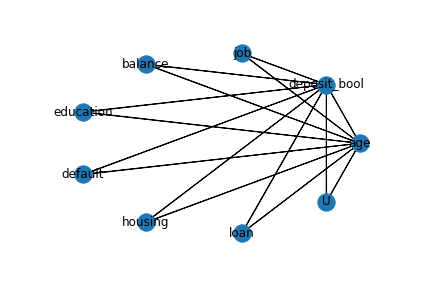

In [73]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [74]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['loan', 'housing', 'U', 'job', 'education', 'balance', 'default']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                         
──────(Expectation(deposit_bool|loan,housing,job,education,balance,default))
d[age]                                                                      
Estimand assumption 1, Unconfoundedness: If U→{age} and U→deposit_bool then P(deposit_bool|age,loan,housing,job,education,balance,default,U) = P(deposit_bool|age,loan,housing,job,education,balance,default)
### Estimand : 2
Estimand name: iv
No such variable found!



#### Stratification

In [75]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: deposit_bool~age+loan+housing+job+education+balance+default
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
INFO:numexpr.utils:NumExpr defaulting to 4 threads.


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                         
──────(Expectation(deposit_bool|loan,housing,job,education,balance,default))
d[age]                                                                      
Estimand assumption 1, Unconfoundedness: If U→{age} and U→deposit_bool then P(deposit_bool|age,loan,housing,job,education,balance,default,U) = P(deposit_bool|age,loan,housing,job,education,balance,default)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: deposit_bool~age+loan+housing+job+education+balance+default
## Estimate
Value: -0.02939634727057166

Causal Estimate is -0.02939634727057166


#### Refuting the model

In [76]:
res_random=model.refute_estimate(identified_estimand, causal_estimate , method_name="random_common_cause")
print(res_random)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: deposit_bool~age+loan+housing+job+education+balance+default+w_random


Refute: Add a Random Common Cause
Estimated effect:(-0.02939634727057166,)
New effect:(-0.0291456793062389,)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Regression 

Please enter path for dataset to run 

In [14]:
df = pd.read_csv("/Users/SK-MBP/Documents/MMA/EnterpriseAnalytics/FinalProject/bank.csv") 

In [77]:
common_causes_names = ["job","balance","education","default","housing","loan"]
treatment_names = ['age']
outcome_name = ['deposit_bool']
instrument_names = ["marital","contact","day","month","duration","campain","pdays","previous"]

In [78]:
model=CausalModel(
        data = df,
        treatment=treatment_names,
        outcome=outcome_name,
        common_causes = common_causes_names)

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['age'] on outcome ['deposit_bool']


INFO:dowhy.causal_graph:Using Matplotlib for plotting
/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


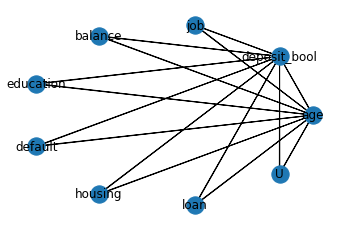

In [79]:
model.view_model(layout="dot")

In [80]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['loan', 'housing', 'U', 'job', 'education', 'balance', 'default']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                         
──────(Expectation(deposit_bool|loan,housing,job,education,balance,default))
d[age]                                                                      
Estimand assumption 1, Unconfoundedness: If U→{age} and U→deposit_bool then P(deposit_bool|age,loan,housing,job,education,balance,default,U) = P(deposit_bool|age,loan,housing,job,education,balance,default)
### Estimand : 2
Estimand name: iv
No such variable found!



In [81]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: deposit_bool~age+loan+housing+job+education+balance+default


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                         
──────(Expectation(deposit_bool|loan,housing,job,education,balance,default))
d[age]                                                                      
Estimand assumption 1, Unconfoundedness: If U→{age} and U→deposit_bool then P(deposit_bool|age,loan,housing,job,education,balance,default,U) = P(deposit_bool|age,loan,housing,job,education,balance,default)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: deposit_bool~age+loan+housing+job+education+balance+default
## Estimate
Value: -0.02748007088450033

## Statistical Significance
p-value: 0.003

Causal Estimate is -0.02748007088450033


In [87]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,deposit,deposit_bool,propensity_score,strata,dbar,d_y,dbar_y
0,True,admin.,married,secondary,no,2343,yes,no,unknown,5,...,-1,0,unknown,yes,1,0.336617,20.0,0,1,0
1,True,admin.,married,secondary,no,45,no,no,unknown,5,...,-1,0,unknown,yes,1,0.425530,33.0,0,1,0
2,False,technician,married,secondary,no,1270,yes,no,unknown,5,...,-1,0,unknown,yes,1,0.306444,16.0,1,0,1
3,True,services,married,secondary,no,2476,yes,no,unknown,5,...,-1,0,unknown,yes,1,0.261148,8.0,0,1,0
4,True,admin.,married,tertiary,no,184,no,no,unknown,5,...,-1,0,unknown,yes,1,0.276549,11.0,0,1,0


#### Interpretation



##### Stratification

The hypothesis we are looking to research is whether there or not there is a causal relationship between PER and player salary (Performance efficiency rating).  

Looking only at PER as a treatment variable, it seems that the causal effect PER (Performance efficiency rating) is 1143325.5649133483. This would mean that for every unit increase in PER, a players salary could go up by nearlt 1 million dollars.  

While this may seems good for a player, this is likely not realistic.There may be some non-linearity effects or we must test using another method.

##### Regression

The hypothesis we are looking to research is whether there or not there is a causal relationship between PER and player salary (Performance efficiency rating).  

We also look at the causal relationship of other predictors on player salary (such as PTS and AST).  

Looking at PER as the treament variable, we see that first it is a significant treamtent variable (p < 0.001) and its effect using a linear regression model is 346183.40875005396$.  

This would imply that for every unit increase in PER, a player could expect roughly 350000$ increase in salary. This estimate is much more realistic, given the nature of the metric. 

Here is the causal effect of each variable on player salary and the associated p-value:  

Age = 275168.1855595012  (p < 0.001)  
PER = 346183.40875005396  (p < 0.001)  
PTS = 4850.733021190856  (p < 0.001)  
FG% = -9891630.892477505  (p < 0.001)  
3P = -4494.621079170145  (p = 0.08)  
DRB = 5958.506927917711  (p < 0.001)  
AST = 250.49329185578972  (p = 0.436)  

The biggest anomaly is the causal effect of FG%. FG% denotes the efficiency at which a player scores a basket (i.e. 2p or 3p scored shots / 2p or 3p attempts). The causal effect seems that every unit increase in FG%, a player's salary should go down by roughly 10 million dollars which does not make sense. There night be some non-linear effect that is not captured properly.


** PLOT DOES NOT LOOK VERY GOOD **